# Chapter 3. Algorithm Analysis

"Simply put, a **data structure** is a systematic way of organizing and accessing data, and an **algorithm** is a step-by-step procedure for performing some task in a finite amount of time." (110)

## 3.1. Experimental studies

You can measure the performance of an algorithm by seeing how long it takes to run:

In [2]:
from time import time

def function_to_benchmark(size):
    "-".join(str(n) for n in range(size))

start_time = time()
function_to_benchmark(100)
end_time = time()

end_time - start_time

9.775161743164062e-05

The above isn't a brilliant measure of the performance of an algorithm though, because other programs might use up CPU cycles between its start and end. You'd get a better measurement by looking at the number of CPU cycles used by the algorithm.

Python has a nice module called `timeit` to measure benchmark algorithms by looking at how many CPU cycles they use, and can even repeat the test a given number of times to help eliminate factors like small variances in the CPU's performance.

In [3]:
from timeit import timeit

timeit(lambda: function_to_benchmark(100), number=10) / 10

2.9970600007800385e-05

A nice way to go about measuring the performance of an algorithm is to run it with different input sizes and visualise the results with a scatterplot. Input size on the x axis and running time on the y axis.

In [4]:
# https://nickmccullum.com/python-visualization/scatterplot/

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

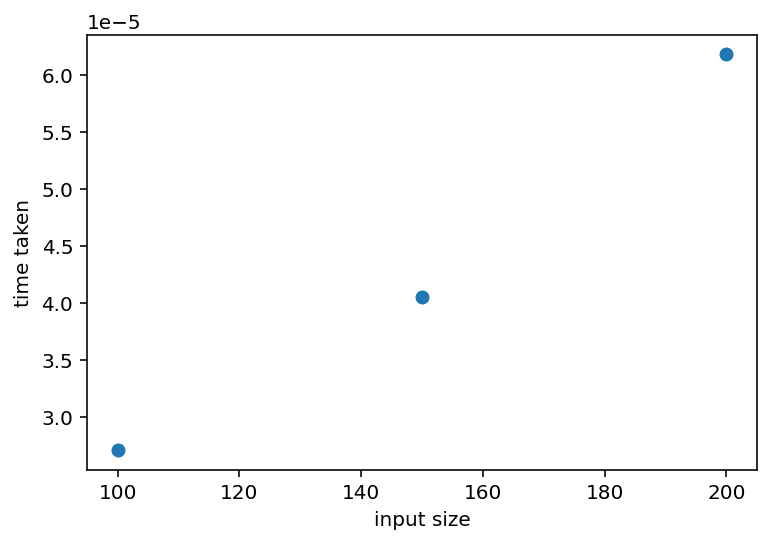

In [5]:
input_sizes = [100, 150, 200]

durations = [timeit(lambda: function_to_benchmark(n), number=15) / 15 for n in input_sizes]

plt.xlabel('input size')
plt.ylabel('time taken')
plt.scatter(input_sizes, durations)

#### Challenges of experimental analysis

The most serious drawback of experimental analysis is that you need to fully implement an algorithm to accurately test its performance. "At early stages of design, when considering a choice of data structures or algorithms, it would be foolish to spend a significant amount of time implementing an approach that could easily be deemed inferior by a higher-level analysis" (112).

### 3.1.1. Moving beyond experimental analysis

>Our goal is to develop an approach to analyzing the efficiency of algorithms that:
>1. Allows us to evaluate the relative efficiency of any two algorithms in a way that is **independent of the hardware and software environment.**
>2. Is performed by studying a high-level description of the algorithm **without need for implementation.**
>3. Takes into account **all possible inputs.** (113)

#### Counting primitive operations

To construct a high-level description of an algorithm, it should be broken down into _primitive operations_ such as...

1. Assigning an identifier to an object
2. Determining the object associated with an identifier
3. Performing an arithmetic operation (for example, adding two numbers)
4. Comparing two numbers
5. Accessing a single element of a Python `list` by index
6. Calling a function (excluding operations executed within the function)
7. Returning from a function

"Formally, a primitive operation corresponds to a low-level instruction with an execution time that is constant" (113). In practice, many of these operations are translated into a small number of hardware instructions but for simplicity we'll assume each _primitive operation_ takes the same length of time and use the count of operations as _t_ to measure the running time of the algorithm.

To capture the **order of growth** of an algorithm’s running time, each algorithm can be assigned a function _f(n)_ which characterises the number of primitive operations performed as a function of the input size _n_. There are seven common functions for this characterisation:

1. Constant
2. Logarithm
3. Linear
4. _N_-Log-_N_
5. Quadratic
6. Cubic (and other polynomials)
7. Exponential

A note: different _kinds_ of input (of the same size) might perform differently. To keep things simple, we assume worst-case input. "Making the standard of success for an algorithm to perform well in the worst case necessarily requires that it will do well on every input" (114).

## 3.2. The seven order of growth functions

### Constant

$$f(n) = c$$

It doesn't matter how big the input is, the output is constant.

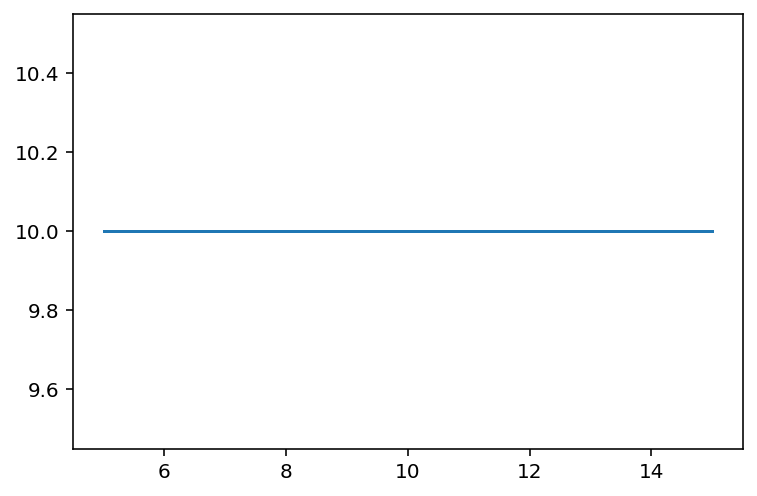

In [6]:
plt.plot([5, 10, 15], [10, 10, 10])

### Logarithm

$f(n) = \log_bn$, for some constant $b > 1$.

**What is log?**

$x = \log_bn$ if and only if $b^{x} = n$

$b$ is the _base_ of the logarithm, and by definition $\log_b1 = 0$. The most common base in computer science is 2 and it's _so_ common that it's typically omitted when it is 2. 

In other words: $\log n = log_2n$ 

A _good enough_ approximation can be calculated thus:

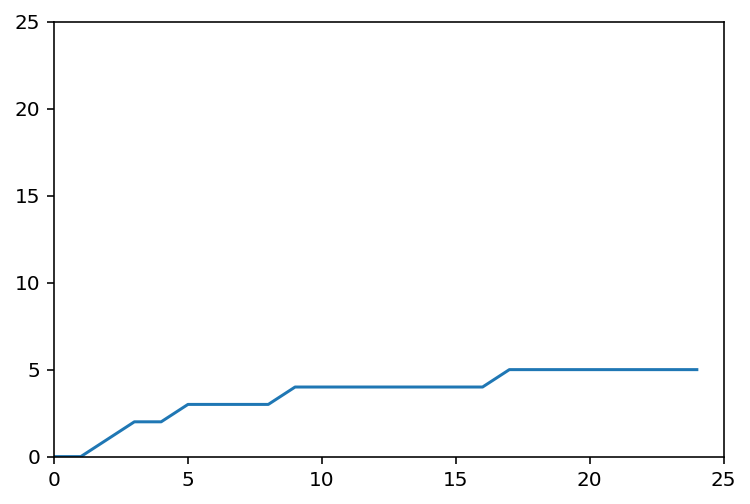

In [7]:
def approx_log_ceiling(b, n):
    """returns the smallest integer greater than or equal to log (base b) n"""
    reduced = n
    reductions = 0
    while reduced > 1:
        reduced = reduced / b
        reductions += 1
        
    return reductions

input = range(25)

output = [approx_log_ceiling(2, x) for x in input]

plt.axis([0, 25, 0, 25])
plt.plot(input, output)

### Linear

$$f(n) = n$$

"For example, comparing a number x to each element of a sequence of size n will require n comparisons. The linear function also represents the best running time we can hope to achieve for any algorithm that processes each of n objects that are not already in the computer’s memory, because reading in the n objects already requires n operations" (117).

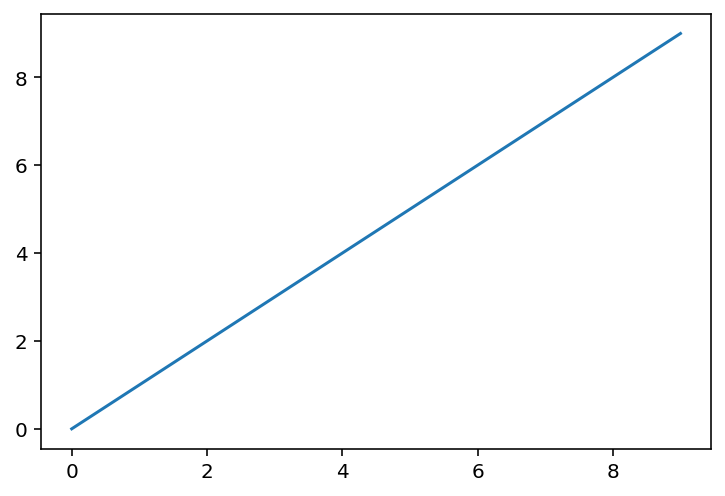

In [8]:
plt.plot(range(10), range(10))

### _N_-Log-_N_

$$f(n) = n \log n$$

"This function grows a little more rapidly than the linear function and a lot less rapidly than the quadratic function. [...] the fastest possible algorithms for sorting n arbitrary values require time proportional to $n$ log $n$" (117).

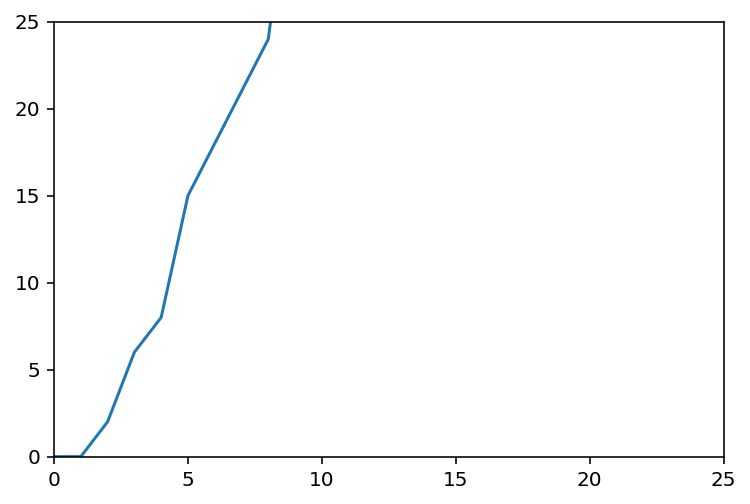

In [9]:
input = range(25)

output = [n * approx_log_ceiling(2, n) for n in input]

plt.axis([0, 25, 0, 25])
plt.plot(input, output)

### Quadratic

$$f(n) = n{^2}$$

Two common ways of getting this time complexity:

1. Nested loop where each loop looks at all of the elements in a list
2. Nested loop where the number of iterations increases by one each time up to a max of n, or decreases from a max of n to 0

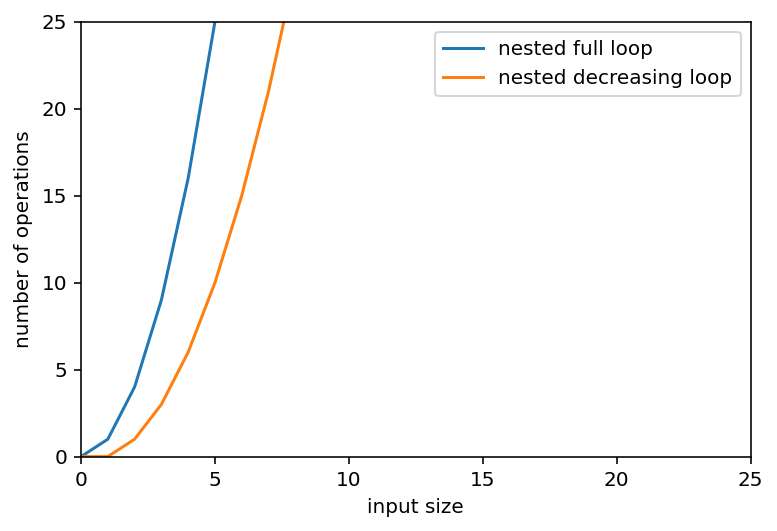

In [10]:
inputs = list(range(25))

def nested_full_loop(list_length):
    l = list(range(list_length))
    operations = 0
    
    outer_index = 0
    while outer_index < len(l):
        inner_index = 0
        while inner_index < len(l):
            # do stuff
            operations += 1
            inner_index += 1
        outer_index += 1
        
    return operations

def nested_decreasing_loop(list_length):
    l = list(range(list_length))
    operations = 0
    
    outer_index = 0
    while outer_index < len(l):
        inner_index = outer_index + 1
        while inner_index < len(l):
            # do stuff comparing l[outer_index] and l[inner_index]
            operations += 1
            inner_index += 1
        outer_index += 1
        
    return operations

nested_full_loop_outputs = [nested_full_loop(x) for x in inputs]

nested_decreasing_loop_outputs = [nested_decreasing_loop(x) for x in inputs]

plt.axis([0, 25, 0, 25])
plt.xlabel('input size')
plt.ylabel('number of operations')
plt.plot(inputs, nested_full_loop_outputs, label = "nested full loop")
plt.plot(inputs, nested_decreasing_loop_outputs, label = "nested decreasing loop")
plt.legend()

Although the "nested decreasing loop" has a lower operation count than "nested full loop" with the same input, "the order of growth is still quadratic in $n$" - the lines are basically the same shape (119).

A fun story about this:

"In 1787, a German schoolteacher decided to keep his 9- and 10-year-old pupils occupied by adding up the integers from 1 to 100. But almost immediately one of the children claimed to have the answer! The teacher was suspicious, for the student had only the answer on his slate. But the answer, 5050, was correct and the student, Carl Gauss, grew up to be one of the greatest mathematicians of his time. We presume that young Gauss used the following identity." (118)

_For any integer_ $n$ ${\geq}$ $1$:

$$1 + 2 + 3 + {\cdots} + (n - 2) + (n - 1) + n = {\frac{n(n+1)}{2}}$$

The above identity has the sequence incrementing by one from 1 to $n$, and the `nested_decreasing_loop` function had the sequence decrementing by one from $n$ to 1 as it got further through the list, but the effect is the same.

### Cubic and other polynomials

$$f(n) = n{^3}$$

"This func- tion appears less frequently in the context of algorithm analysis than the constant, linear, and quadratic functions previously mentioned, but it does appear from time to time" (119).

#### Polynomials

There are some intimidating definitions of polynomials, but [mathsisfun.com](https://www.mathsisfun.com/algebra/polynomials.html) has a pretty simple one: "A polynomial can have constants, variables and exponents, but never division by a variable". Addition, subtraction, multiplication and division are allowed (except for division by a variable) and the number of terms must be finite.

By those rules, most of the seven _Order of Growth Functions_ are polynomials, but "the constant, linear, and quadratic functions are too important to be lumped in with other polynomials" (119). That's because they have bigger/smaller _degrees_ (in polynomial terms) which gives them significantly better/worse running time.

**A polynomial's _degree_ is its highest exponent**, and the importance of the degree explains why the two lines in the quadratic graph above look so similar (they've both got an $n{^2}$).

Constants in a polynomial are called coefficients.

## Aside: summation formulas and sigma notation

_Notes on [a YouTube video](https://youtu.be/XJkIaw2e1Pw)_

Basically, the number at the bottom of the $\sum$ is where you start, the number at the top is where you finish, and for each of the numbers between the start and finish (inclusive) you calculate the formula on the right hand side and sum together all the results.

$$\sum\limits_{i=1}^n c = c n$$

$\displaystyle\sum\limits_{i=1}^4 8$ <- this means add 8 together four times

$$\sum\limits_{i=1}^n i = \frac{n(n+1)}{2}$$

$\displaystyle\sum\limits_{i=1}^5 i$ <- this means add up all the numbers from one to five

$\displaystyle\sum\limits_{i=1}^4 6i = 6 + 12 + 18 + 24 = 60 = 6 \left[ \frac{4(4+1)}{2} \right]$

### The exponential function

$$f(n) = b{^n}$$

$b$ here is the _base_ (a positive constant) and is most commonly equal to 2. "If we have a loop that starts by performing one operation and then doubles the number of operations performed with each iteration, then the number of operations performed in the $n^{th}$ iteration is $2^n$

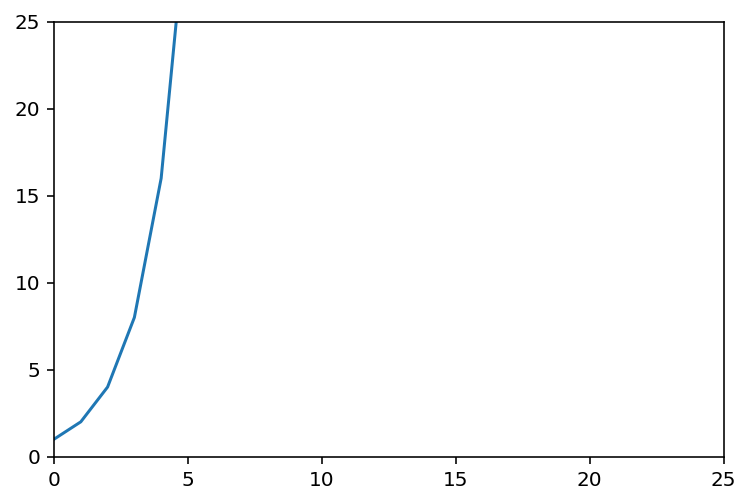

In [11]:
input = range(25)

output = [2 ** n for n in input]

plt.axis([0, 25, 0, 25])
plt.plot(input, output)

#### Exponent rules

1. $(b^a)^c = b^{ac}$
2. $b^ab^c = b^{a+c}$
3. $b^a/b^c = b^{a-c}$

There are more clever rules on page 121.